In [1]:
import pandas as pd
import numpy as np

In [77]:
df = pd.DataFrame(np.random.randint(0,100,size=(50, 4)), columns=list('ABCD'))
df.head()

,A,B,C,D
0,53,36,97,97
1,65,68,44,91
2,32,49,85,68
3,56,5,34,94
4,57,71,95,12


In [78]:
df.dtypes

A    int32
B    int32
C    int32
D    int32
dtype: object

In [28]:
 df2 =df
    

In [32]:
df2.reindex(['0','1'])

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN


In [5]:
df.skew()

A   -0.100334
B   -0.091433
C   -0.257312
D   -0.055200
dtype: float64

In [6]:
df.kurtosis()

A   -1.406362
B   -1.509662
C   -0.866877
D   -1.112579
dtype: float64

In [7]:
df.max()

A    97
B    97
C    98
D    96
dtype: int32

In [8]:
df.min()

A    0
B    1
C    1
D    0
dtype: int32

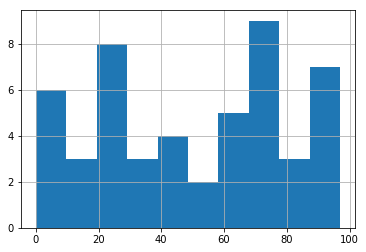

In [22]:
%matplotlib inline
df['A'].hist(bins=10)

In [10]:
df.describe()

,A,B,C,D
count,50.000000,50.000000,50.00000,50.000000
mean,50.240000,51.780000,57.20000,47.920000
std,30.959856,31.722193,25.68252,28.325254
min,0.000000,1.000000,1.00000,0.000000
25%,22.750000,22.250000,35.25000,26.500000
50%,53.500000,48.000000,54.50000,46.500000
75%,77.000000,79.750000,78.75000,71.500000
max,97.000000,97.000000,98.00000,96.000000


In [11]:
type(df.skew())

pandas.core.series.Series

In [12]:
df.median()

A    53.5
B    48.0
C    54.5
D    46.5
dtype: float64

In [62]:
def skew_highlight(x):
    color = 'red' if (float(x) <-0.1 ) or (float(x) > 0.1) else 'black'
    return 'color: %s' % color

In [74]:
def my_describe(df):
    my_format = lambda x: '%.3f' % x
    frames = []
    skewness = pd.Series(name = 'Skewness')
    kurtosis = pd.Series(name = 'Kurtosis')
    missing_count = pd.Series(name = 'missing')
    median = pd.Series(name='median')
    desc_stat = pd.DataFrame()
    skewness = df.skew()
    
    #skewness.rename('Skew')
    skewness.apply(skew_highlight)
    kurtosis = df.kurtosis()
    median = df.median()
    desc_stat = df.describe()
    missing_count = df.isnull().sum()
    frames = [skewness, kurtosis, missing_count, median]
    result1 = pd.concat(frames, keys = ['skew', 'kurtosis', 'missing', 'median']).unstack(level=-1)
    #frames = [desc_stat, skewness.T, kurtosis.T, missing_count.T]
    result = pd.concat([desc_stat, result1])
    result = result.applymap(my_format)
    #result.ix['skew'] = result.ix['skew'].style.applymap(skew_highlight)
    return(result)
    

In [76]:
my_describe(df).dtypes

A    object
B    object
C    object
D    object
dtype: object

,A,B,C,D
0,40,89,16,62
1,3,32,5,21
2,5,78,82,70
3,84,87,94,28
4,97,93,19,75
5,92,82,36,50
6,58,65,82,66
7,37,80,78,86
8,88,17,27,70
9,25,48,32,90
